In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset=os.listdir('/content/drive/MyDrive/Data/train')
test_dataset=os.listdir('/content/drive/MyDrive/Data/test')
valid_dataset=os.listdir('/content/drive/MyDrive/Data/valid')
train_dataset_path="/content/drive/MyDrive/Data/train"
test_dataset_path="/content/drive/MyDrive/Data/test"
valid_dataset_path="/content/drive/MyDrive/Data/valid"

In [ ]:
print(train_dataset)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'normal']


In [ ]:
print(test_dataset)

['normal', 'squamous.cell.carcinoma', 'large.cell.carcinoma', 'adenocarcinoma']


In [ ]:
xtrain_label_path=[]
xtest_label_path=[]

trainlabel={'normal':0, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib':1, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa':2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':3}
testlabel={'normal':0, 'squamous.cell.carcinoma':3, 'adenocarcinoma':1, 'large.cell.carcinoma':2}

ytrain_label=[]
ytest_label=[]

for path in train_dataset:
  c=path
  p= os.path.join(train_dataset_path,path)
  # print(p)
  for i in os.listdir(p):
    pt = os.path.join(p+"/"+i)
    xtrain_label_path.append(pt)
    ytrain_label.append(trainlabel[c])

for path in valid_dataset:
  c=path
  p= os.path.join(valid_dataset_path,path)
  for i in os.listdir(p):
    pt = os.path.join(p+"/"+i)
    xtrain_label_path.append(pt)
    ytrain_label.append(trainlabel[c])

for path in test_dataset:
  c=path
  p= os.path.join(test_dataset_path,path)
  for i in os.listdir(p):
    pt = os.path.join(p+"/"+i)
    xtest_label_path.append(pt)
    ytest_label.append(testlabel[c])

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Assuming 'X_images' is a list of paths to your images and 'y' is your labels
X_images = xtrain_label_path  # Replace with your actual image paths
y = ytrain_label     # Replace with your actual labels

# Preprocess images for VGG16
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Extract features using VGG16
X_features = []
for img_path in X_images:
    img_array = preprocess_image(img_path)
    features = base_model.predict(img_array)
    X_features.append(features.flatten())

X_features = np.array(X_features)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1/1 [==============================] - 0s 17ms/step
(548, 25088)
(137, 25088)
(548,)
(137,)


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create an SVM classifier
model = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')

model.fit(X_train, y_train)


# Calculate test accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
# test_accuracies.append(test_accuracy)
print(test_accuracy)



0.9635036496350365


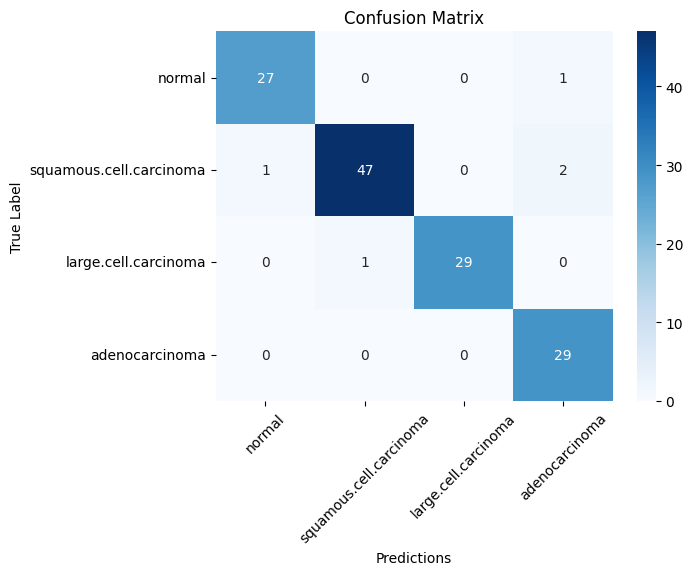

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset, yticklabels=test_dataset)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Label')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
from sklearn import metrics
report = metrics.classification_report(y_test, y_test_pred, target_names=test_dataset)
print(report)

                         precision    recall  f1-score   support

                 normal       0.96      0.96      0.96        28
squamous.cell.carcinoma       0.98      0.94      0.96        50
   large.cell.carcinoma       1.00      0.97      0.98        30
         adenocarcinoma       0.91      1.00      0.95        29

               accuracy                           0.96       137
              macro avg       0.96      0.97      0.96       137
           weighted avg       0.97      0.96      0.96       137

